In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "exploration_results.csv" 
df = pd.read_csv(file_path)

In [37]:
def plot_heatmap(df, metric, before=True, save=False):
    # Filter based on the 'before' column
    filtered_df = df[df['before'] == before]
    
    # Pivot the table for heatmap
    heatmap_data = filtered_df.pivot_table(index='h_mm', columns='h_MM', values=metric)
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': metric})
    plt.gca().invert_yaxis()
    plt.title(f"Heatmap of {metric} ({'Before Attack' if before else 'After Attack'})")
    plt.xlabel('h_MM')
    plt.ylabel('h_mm')

    if save:
        plt.savefig(f"{metric}_{'before' if before else 'after'}.png")
    else:
        plt.show()

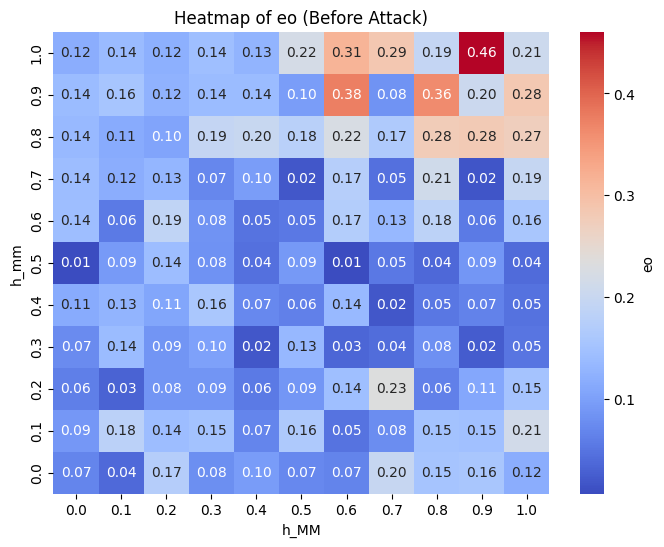

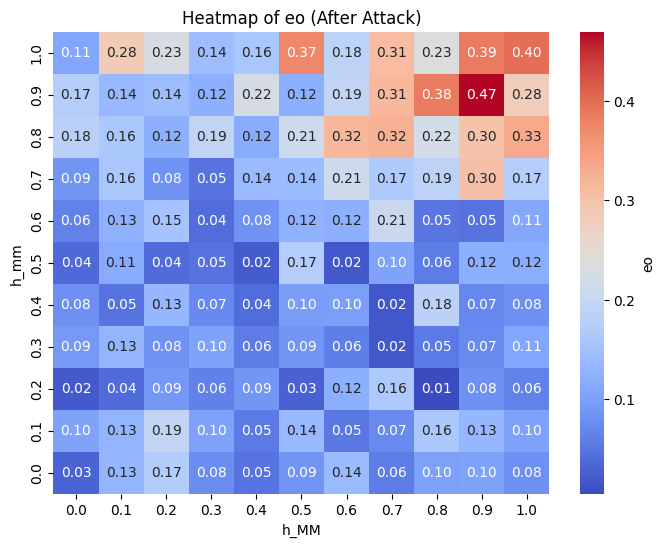

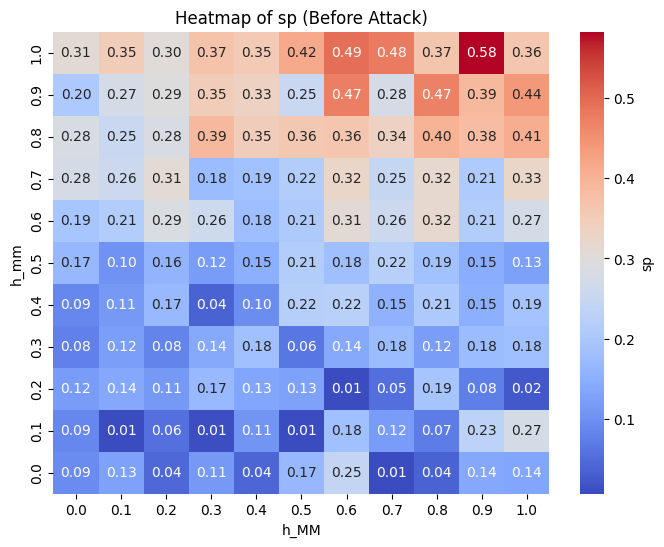

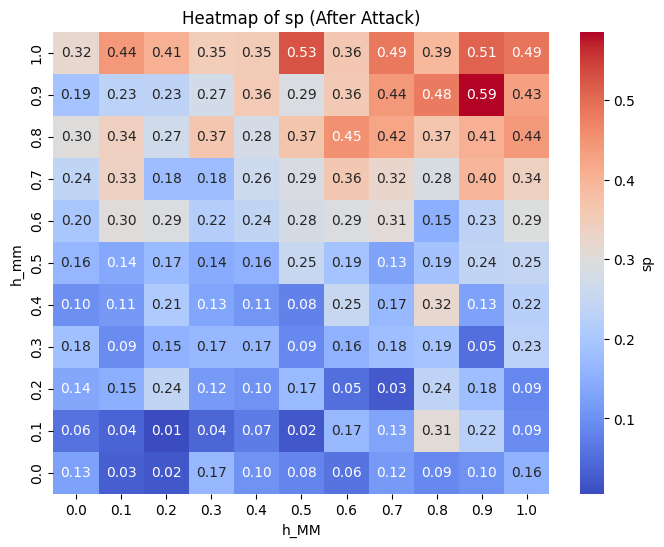

In [38]:
plot_heatmap(df, metric='eo', before=True, save=True)  # Heatmap for EO before
plot_heatmap(df, metric='eo', before=False, save=True)  # Heatmap for EO after
plot_heatmap(df, metric='sp', before=True, save=True)  # Heatmap for SP before
plot_heatmap(df, metric='sp', before=False, save=True)  # Heatmap for SP after

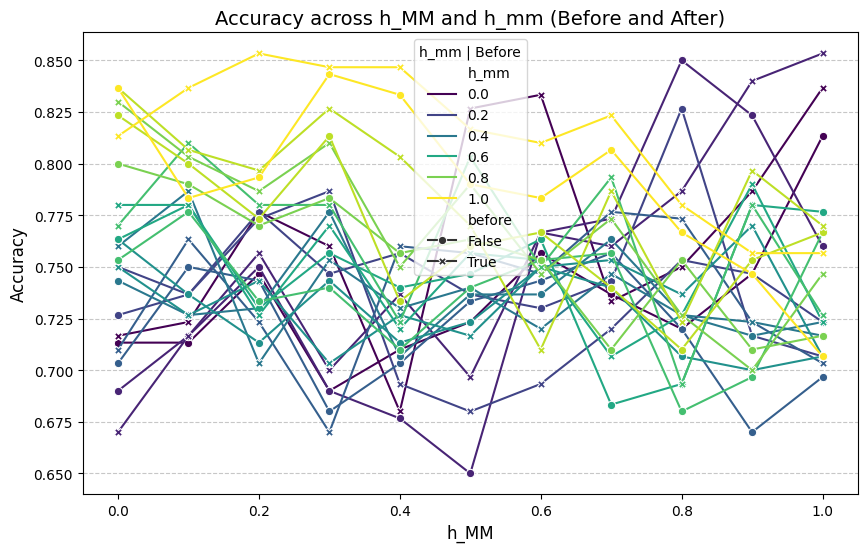

In [34]:
def plot_accuracies(df):
    plt.figure(figsize=(10, 6))
    
    # Line plot for accuracies
    sns.lineplot(
        data=df, 
        x="h_MM", 
        y="accuracy", 
        hue="h_mm", 
        style="before",
        markers=True,
        dashes=False,
        palette="viridis"
    )
    
    # Add labels and title
    plt.title("Accuracy across h_MM and h_mm (Before and After)", fontsize=14)
    plt.xlabel("h_MM", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.legend(title="h_mm | Before")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Call the function
plot_accuracies(df)
